# EDA de Datos de Estudiantes

Este notebook realiza un Análisis Exploratorio de Datos sobre `raw_student_data.csv`.

## Objetivos
- Entender estructura y calidad de datos
- Identificar variables relevantes para modelos (predicción de `Target`)
- Detectar outliers y relaciones entre variables académicas y resultado final
- Proponer siguientes pasos de feature engineering

## Secciones
1. Carga y vista inicial
2. Limpieza y tratamiento de nulos/códigos
3. Estadísticas descriptivas
4. Distribuciones y outliers
5. Correlaciones y asociaciones
6. Balance de clases y objetivo
7. Conclusiones y próximos pasos

In [1]:
# Importaciones y configuración
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', 40)
plt.style.use('seaborn-v0_8')

DATA_PATH = Path('raw_student_data.csv')
assert DATA_PATH.exists(), 'No se encuentra el CSV'

# Detección sencilla de separador
sep = ','  # ya comprobado previamente

df = pd.read_csv(DATA_PATH, sep=sep)
print(df.shape)
df.head()

(4432, 36)


,Unnamed: 0,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nacionality,Mother.s.qualification,Father.s.qualification,Mother.s.occupation,Father.s.occupation,Displaced,Educational.special.needs,Debtor,Tuition.fees.up.to.date,Gender,Scholarship.holder,Age.at.enrollment,International,Curricular.units.1st.sem..credited.,Curricular.units.1st.sem..enrolled.,Curricular.units.1st.sem..evaluations.,Curricular.units.1st.sem..approved.,Curricular.units.1st.sem..grade.,Curricular.units.1st.sem..without.evaluations.,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
0,1,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
# Limpieza inicial
# 1. Remover columna que parece ser índice
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Resumen de nulos
nulos = df.isna().sum().sort_values(ascending=False)
porc = (nulos/len(df))*100
nulos_df = (pd.DataFrame({'n_nulls': nulos, 'pct_nulls': porc}))
print(nulos_df.head(10))

# Decisión sobre Target nulo: eliminar filas (pequeño porcentaje) -> se podría imputar pero es variable objetivo
mask_target_null = df['Target'].isna()
print('Filas con Target nulo:', mask_target_null.sum())

df_clean = df.loc[~mask_target_null].copy()
print('Shape tras eliminar Target nulo:', df_clean.shape)

df_clean.head()

                                                n_nulls  pct_nulls
Target                                              109   2.459386
Curricular.units.2nd.sem..enrolled.                   0   0.000000
Curricular.units.1st.sem..enrolled.                   0   0.000000
Curricular.units.1st.sem..evaluations.                0   0.000000
Curricular.units.1st.sem..approved.                   0   0.000000
Curricular.units.1st.sem..grade.                      0   0.000000
Curricular.units.1st.sem..without.evaluations.        0   0.000000
Curricular.units.2nd.sem..credited.                   0   0.000000
Curricular.units.2nd.sem..evaluations.                0   0.000000
International                                         0   0.000000
Filas con Target nulo: 109
Shape tras eliminar Target nulo: (4323, 35)


,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nacionality,Mother.s.qualification,Father.s.qualification,Mother.s.occupation,Father.s.occupation,Displaced,Educational.special.needs,Debtor,Tuition.fees.up.to.date,Gender,Scholarship.holder,Age.at.enrollment,International,Curricular.units.1st.sem..credited.,Curricular.units.1st.sem..enrolled.,Curricular.units.1st.sem..evaluations.,Curricular.units.1st.sem..approved.,Curricular.units.1st.sem..grade.,Curricular.units.1st.sem..without.evaluations.,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Estadísticas descriptivas
num_cols = df_clean.select_dtypes(include=['number']).columns
cat_cols = df_clean.select_dtypes(include=['object','category']).columns

print('Columnas numéricas:', len(num_cols))
print('Columnas categóricas:', len(cat_cols))

# Describe extendido
stats_num = df_clean[num_cols].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
stats_num[['mean','std','min','1%','5%','50%','95%','99%','max']] = stats_num[['mean','std','min','1%','5%','50%','95%','99%','max']]
stats_num.head()


Columnas numéricas: 34
Columnas categóricas: 1


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Marital.status,4323.0,1.180893,0.611198,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,6.0
Application.mode,4323.0,6.863521,5.291273,1.0,1.0,1.0,1.0,8.0,12.0,15.0,16.0,18.0
Application.order,4323.0,1.724266,1.311266,0.0,1.0,1.0,1.0,1.0,2.0,5.0,6.0,9.0
Course,4323.0,9.919500,4.329018,1.0,2.0,2.0,6.0,10.0,13.0,17.0,17.0,17.0
Daytime.evening.attendance,4323.0,0.890585,0.312195,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
# Frecuencias categóricas y balance de clases
freqs = {}
for c in cat_cols:
    vc = df_clean[c].value_counts(dropna=False)
    freqs[c] = vc
    print(f"\n=== {c} ===")
    print(vc.head(10))

print('\nBalance Target (%)')
print((df_clean['Target'].value_counts(normalize=True)*100).round(2))


=== Target ===
Target
Graduate    2217
Dropout     1421
Enrolled     685
Name: count, dtype: int64

Balance Target (%)
Target
Graduate    51.28
Dropout     32.87
Enrolled    15.85
Name: proportion, dtype: float64


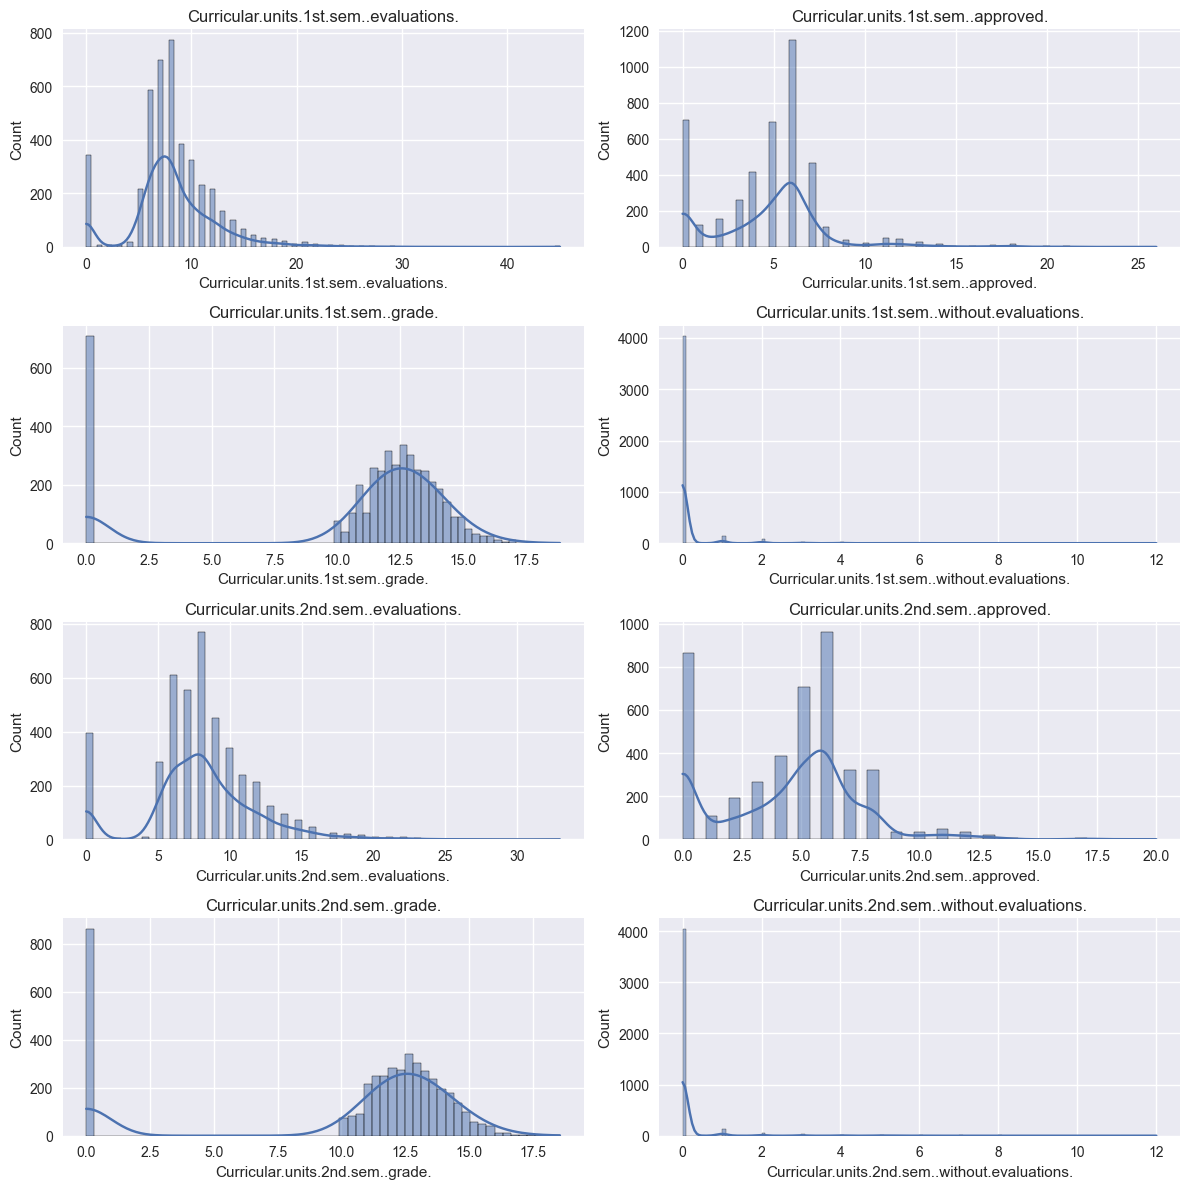

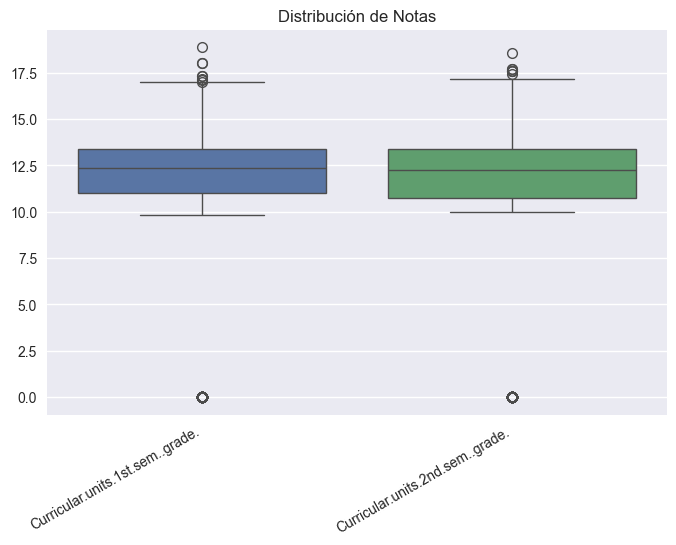

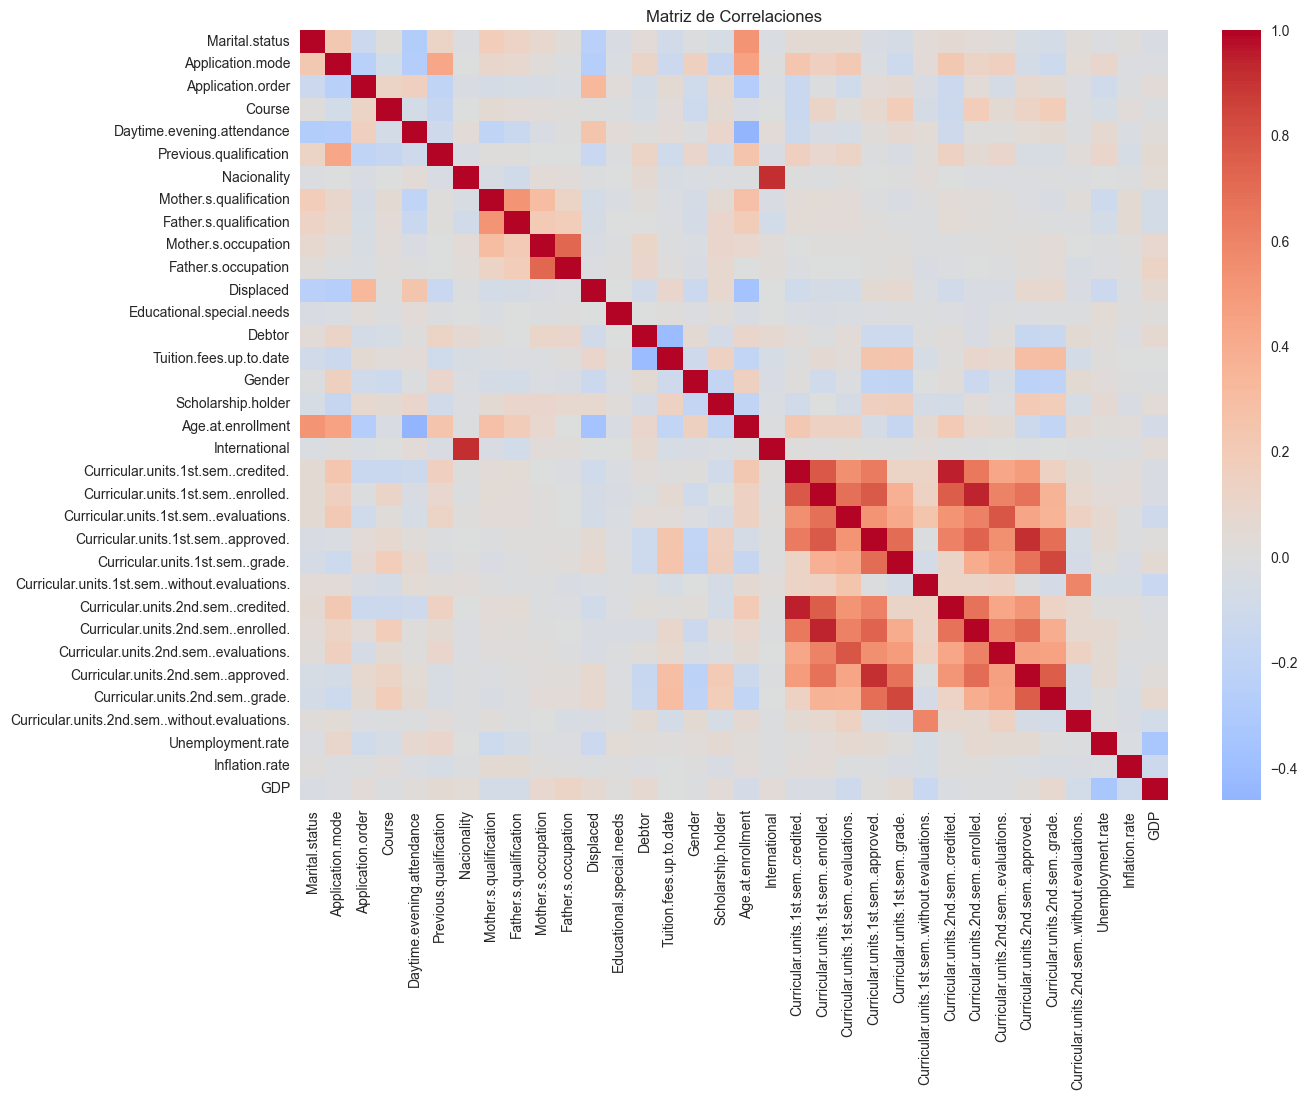

In [5]:
# Visualizaciones básicas
cols_interes = [c for c in num_cols if 'grade' in c or 'approved' in c or 'evaluations' in c][:8]
fig, axes = plt.subplots(len(cols_interes)//2 + len(cols_interes)%2, 2, figsize=(12, 12))
axes = axes.flatten()
for i, c in enumerate(cols_interes):
    sns.histplot(df_clean[c], kde=True, ax=axes[i])
    axes[i].set_title(c)
plt.tight_layout()
plt.show()

# Boxplots de notas
grade_cols = [c for c in num_cols if 'grade' in c]
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean[grade_cols])
plt.xticks(rotation=30, ha='right')
plt.title('Distribución de Notas')
plt.show()

# Heatmap de correlaciones numéricas
corr = df_clean[num_cols].corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Matriz de Correlaciones')
plt.show()

In [6]:
# Correlación numérica con Target (codificación temporal)
# Convertir Target a códigos ordinales para un vistazo rápido (solo para análisis exploratorio)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_target = le.fit_transform(df_clean['Target'])
aux = df_clean[num_cols].copy()
aux['Target_enc'] = encoded_target
corr_target = aux.corr(numeric_only=True)['Target_enc'].sort_values(ascending=False)
print(corr_target.head(15))
print('\nLas variables con correlación negativa más fuerte:')
print(corr_target.tail(10))

Target_enc                                1.000000
Curricular.units.2nd.sem..approved.       0.628445
Curricular.units.2nd.sem..grade.          0.571107
Curricular.units.1st.sem..approved.       0.532745
Curricular.units.1st.sem..grade.          0.489652
Tuition.fees.up.to.date                   0.414033
Scholarship.holder                        0.299535
Curricular.units.2nd.sem..enrolled.       0.177374
Curricular.units.1st.sem..enrolled.       0.157539
Displaced                                 0.114888
Curricular.units.2nd.sem..evaluations.    0.095479
Application.order                         0.091973
Daytime.evening.attendance                0.075938
Curricular.units.2nd.sem..credited.       0.055205
Father.s.occupation                       0.053935
Name: Target_enc, dtype: float64

Las variables con correlación negativa más fuerte:
Inflation.rate                                   -0.027304
Mother.s.qualification                           -0.040111
Curricular.units.1st.sem..withou

## Conclusiones y Próximos Pasos

Hallazgos preliminares:
- `Target` tiene ~2.46% de valores nulos (eliminados). Clases desbalanceadas (ver distribución exacta arriba).
- Muchas variables enteras representan códigos categóricos; convendrá mapear a categorías (diccionarios) si se dispone de metadata.
- Variables de rendimiento (approved, grade, evaluations) parecen clave para predecir `Target`.
- Posible multicolinealidad entre pares similares 1er/2do semestre.
- Columnas macroeconómicas (`Unemployment.rate`, `Inflation.rate`, `GDP`) tienen baja variabilidad relativa; verificar su aporte real al modelo.

Recomendaciones:
1. Generar diccionario de códigos -> etiquetas legibles (si existe documentación).
2. Evaluar técnica de balanceo (SMOTE, class_weight) dependiendo del algoritmo.
3. Crear features agregadas: promedio de notas, ratio aprobadas/matriculadas, total sin evaluaciones.
4. Considerar eliminar columnas redundantes o altamente correlacionadas para modelos lineales.
5. Pipeline de preprocesamiento: imputación (si se decide no eliminar nulos en otras etapas), escalado numérico, codificación categórica.

Siguientes pasos opcionales:
- Análisis de importancia de características (árboles, permutation importance).
- Modelos base (LogisticRegression, RandomForest) para baseline.
- Curva ROC y matriz de confusión inicial.


In [7]:
# Ingeniería de variables para hipótesis
# Crear columnas derivadas necesarias

# Renombrar columnas a alias cortos para manipulación temporal
rename_map = {
    'Curricular.units.1st.sem..enrolled.': 'enrolled_1',
    'Curricular.units.1st.sem..approved.': 'approved_1',
    'Curricular.units.1st.sem..evaluations.': 'evals_1',
    'Curricular.units.1st.sem..grade.': 'grade_1',
    'Curricular.units.1st.sem..without.evaluations.': 'without_eval_1',
    'Curricular.units.2nd.sem..enrolled.': 'enrolled_2',
    'Curricular.units.2nd.sem..approved.': 'approved_2',
    'Curricular.units.2nd.sem..evaluations.': 'evals_2',
    'Curricular.units.2nd.sem..grade.': 'grade_2',
    'Curricular.units.2nd.sem..without.evaluations.': 'without_eval_2'
}

work = df_clean.copy().rename(columns=rename_map)

# Ratios con control de división por cero
for num, den, new_name in [
    ('approved_1','enrolled_1','ratio_aprob_1'),
    ('approved_2','enrolled_2','ratio_aprob_2'),
    ('evals_1','enrolled_1','dens_eval_1'),
    ('evals_2','enrolled_2','dens_eval_2'),
    ('without_eval_1','enrolled_1','sin_eval_ratio_1'),
    ('without_eval_2','enrolled_2','sin_eval_ratio_2')
]:
    work[new_name] = np.where(work[den] > 0, work[num]/work[den], np.nan)

# Notas y diferencias
work['grade_mean'] = work[['grade_1','grade_2']].mean(axis=1)
work['delta_grade'] = work['grade_2'] - work['grade_1']
work['delta_ratio_aprob'] = work['ratio_aprob_2'] - work['ratio_aprob_1']

# Bins de edad para H5
work['age_bin'] = pd.cut(work['Age.at.enrollment'], bins=[0,17,21,25,30,100], labels=['<=17','18-21','22-25','26-30','>30'])

print(work[['ratio_aprob_1','ratio_aprob_2','grade_mean','delta_grade','dens_eval_1','dens_eval_2','sin_eval_ratio_1','sin_eval_ratio_2','delta_ratio_aprob','age_bin']].head())

work.head()

   ratio_aprob_1  ratio_aprob_2  grade_mean  delta_grade  dens_eval_1  \
0            NaN            NaN    0.000000     0.000000          NaN   
1       1.000000       1.000000   13.833333    -0.333333     1.000000   
2       0.000000       0.000000    0.000000     0.000000     0.000000   
3       1.000000       0.833333   12.914286    -1.028571     1.333333   
4       0.833333       1.000000   12.666667     0.666667     1.500000   

   dens_eval_2  sin_eval_ratio_1  sin_eval_ratio_2  delta_ratio_aprob age_bin  
0          NaN               NaN               NaN                NaN   18-21  
1     1.000000               0.0               0.0           0.000000   18-21  
2     0.000000               0.0               0.0           0.000000   18-21  
3     1.666667               0.0               0.0          -0.166667   18-21  
4     1.000000               0.0               0.0           0.166667     >30  


,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nacionality,Mother.s.qualification,Father.s.qualification,Mother.s.occupation,Father.s.occupation,Displaced,Educational.special.needs,Debtor,Tuition.fees.up.to.date,Gender,Scholarship.holder,Age.at.enrollment,International,Curricular.units.1st.sem..credited.,...,Curricular.units.2nd.sem..credited.,enrolled_2,evals_2,approved_2,grade_2,without_eval_2,Unemployment.rate,Inflation.rate,GDP,Target,ratio_aprob_1,ratio_aprob_2,dens_eval_1,dens_eval_2,sin_eval_ratio_1,sin_eval_ratio_2,grade_mean,delta_grade,delta_ratio_aprob,age_bin
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18-21
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,1.000000,1.000000,1.000000,1.000000,0.0,0.0,13.833333,-0.333333,0.000000,18-21
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,18-21
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,1.000000,0.833333,1.333333,1.666667,0.0,0.0,12.914286,-1.028571,-0.166667,18-21
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0.833333,1.000000,1.500000,1.000000,0.0,0.0,12.666667,0.666667,0.166667,>30


## Hipótesis 1 (H1)
Mayor desempeño temprano (ratio_aprob_1 y grade_1) se asocia con mayor probabilidad de Graduate.

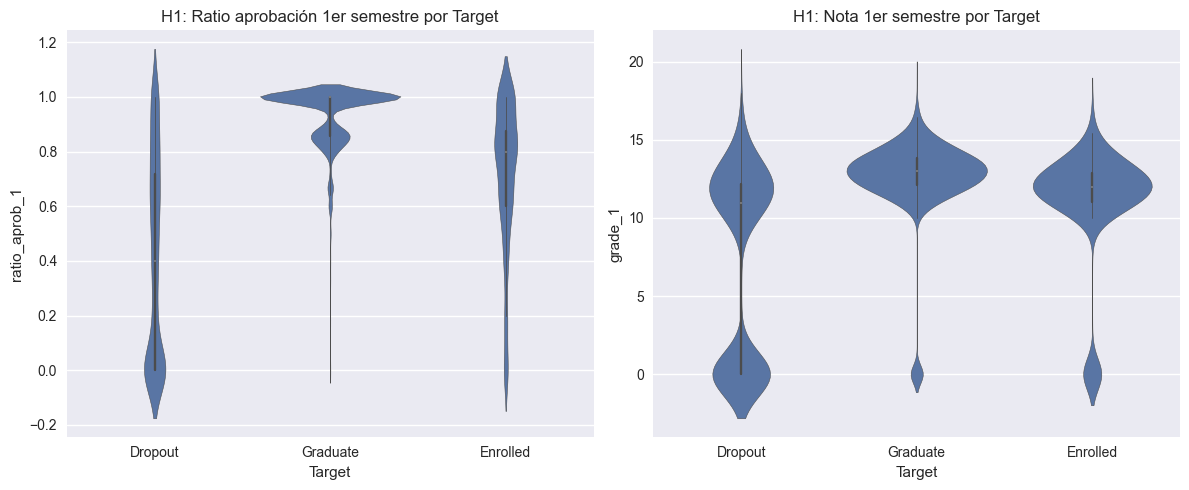

Mann-Whitney ratio_aprob_1 Graduate vs Dropout: U=2589786, p=0.000e+00


In [8]:
# Visualización H1
import scipy.stats as stats

fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.violinplot(data=work, x='Target', y='ratio_aprob_1', ax=axes[0], inner='box')
axes[0].set_title('H1: Ratio aprobación 1er semestre por Target')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('ratio_aprob_1')

sns.violinplot(data=work, x='Target', y='grade_1', ax=axes[1], inner='box')
axes[1].set_title('H1: Nota 1er semestre por Target')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('grade_1')
plt.tight_layout()
plt.show()

# Test no paramétrico Graduate vs Dropout
subset = work[work['Target'].isin(['Graduate','Dropout'])]
grad = subset[subset['Target']=='Graduate']['ratio_aprob_1'].dropna()
drop = subset[subset['Target']=='Dropout']['ratio_aprob_1'].dropna()
stat, p = stats.mannwhitneyu(grad, drop, alternative='two-sided')
print(f'Mann-Whitney ratio_aprob_1 Graduate vs Dropout: U={stat:.0f}, p={p:.3e}')

## Hipótesis 2 (H2)
Una caída en desempeño (delta_grade, delta_ratio_aprob negativos) incrementa la probabilidad de Dropout.

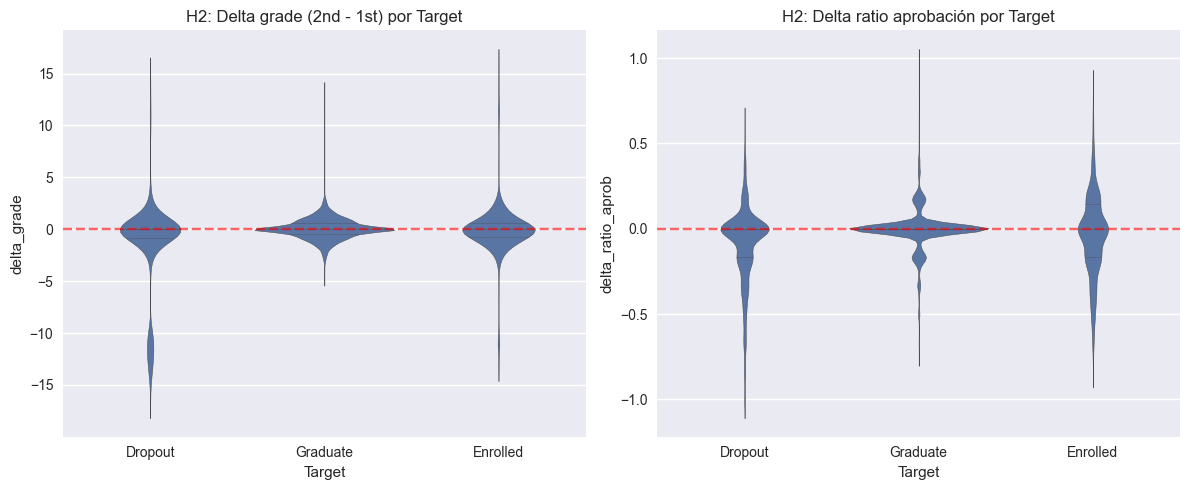

                               Dropout_rate
delta_grade_q                              
(-16.144000000000002, -0.833]      0.413714
(-0.833, 0.0]                      0.387197
(0.0, 0.667]                       0.187307
(0.667, 16.0]                      0.217341


/var/folders/fw/3jb4y4dj6z108zm__f19t88c0000gn/T/ipykernel_82345/2256475823.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = work.groupby('delta_grade_q')['Target'].apply(lambda s: (s=='Dropout').mean()).to_frame('Dropout_rate')


In [9]:
# Visualización H2
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.violinplot(data=work, x='Target', y='delta_grade', ax=axes[0], inner='quartile')
axes[0].set_title('H2: Delta grade (2nd - 1st) por Target')
axes[0].axhline(0, ls='--', c='red', alpha=0.6)

sns.violinplot(data=work, x='Target', y='delta_ratio_aprob', ax=axes[1], inner='quartile')
axes[1].set_title('H2: Delta ratio aprobación por Target')
axes[1].axhline(0, ls='--', c='red', alpha=0.6)
plt.tight_layout(); plt.show()

# Cuartiles de delta_grade y tasa de Dropout
work['delta_grade_q'] = pd.qcut(work['delta_grade'], q=5, duplicates='drop')
rate = work.groupby('delta_grade_q')['Target'].apply(lambda s: (s=='Dropout').mean()).to_frame('Dropout_rate')
print(rate)


## Hipótesis 3 (H3)
Mayor densidad de evaluaciones (evals/enrolled) se asocia con mayor probabilidad de graduarse.

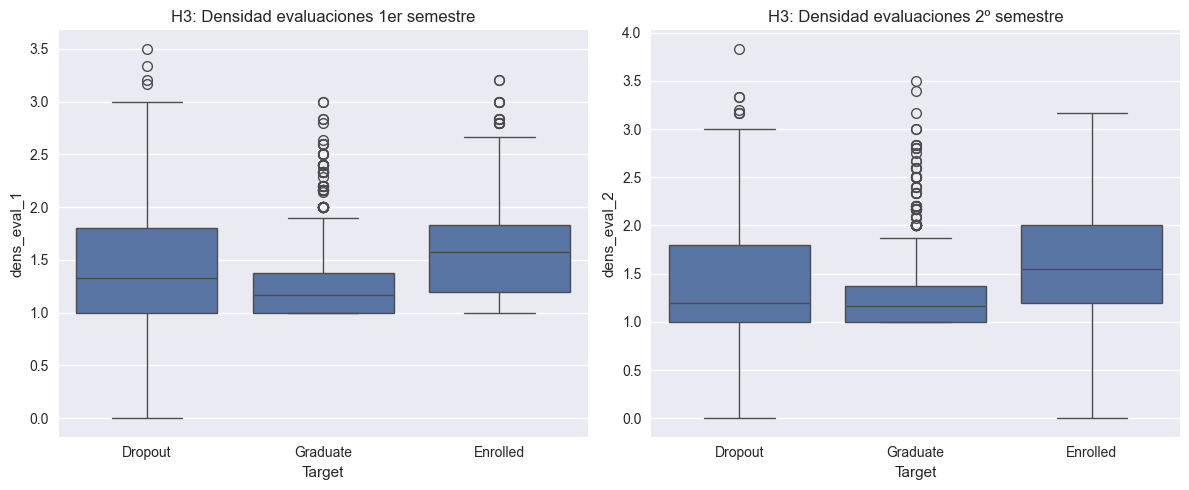

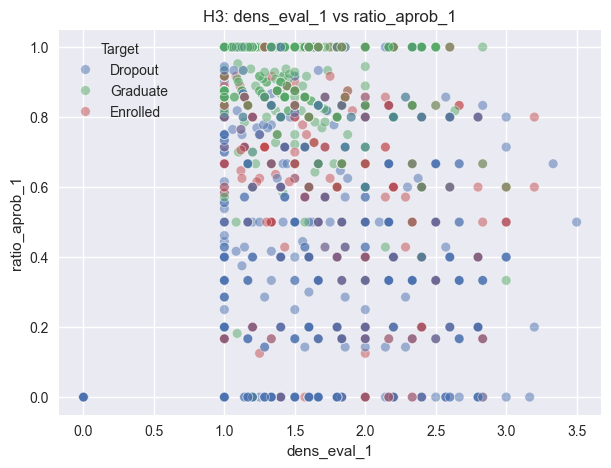

             dens_eval_1  dens_eval_2  Target_bin
dens_eval_1     1.000000     0.668502   -0.087529
dens_eval_2     0.668502     1.000000   -0.009331
Target_bin     -0.087529    -0.009331    1.000000


In [10]:
# Visualización H3
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(data=work, x='Target', y='dens_eval_1', ax=axes[0])
axes[0].set_title('H3: Densidad evaluaciones 1er semestre')

sns.boxplot(data=work, x='Target', y='dens_eval_2', ax=axes[1])
axes[1].set_title('H3: Densidad evaluaciones 2º semestre')
plt.tight_layout(); plt.show()

# Scatter densidad vs ratio aprobación
plt.figure(figsize=(7,5))
sns.scatterplot(data=work, x='dens_eval_1', y='ratio_aprob_1', hue='Target', alpha=0.5)
plt.title('H3: dens_eval_1 vs ratio_aprob_1')
plt.show()

# Correlación simple con Target codificado
subset = work[work['Target'].isin(['Graduate','Dropout'])].copy()
subset['Target_bin'] = (subset['Target']=='Graduate').astype(int)
print(subset[['dens_eval_1','dens_eval_2','Target_bin']].corr())

## Hipótesis 4 (H4)
Estar al día en pagos (Tuition.fees.up.to.date=1) y no ser deudor (Debtor=0) se asocia con mayor graduación y menor abandono.

Proporciones por estado de pago:
Target                    Dropout  Enrolled  Graduate
Tuition.fees.up.to.date                              
0                        0.875479  0.068966  0.055556
1                        0.253617  0.170745  0.575638

Proporciones por estado de deudor:
Target   Dropout  Enrolled  Graduate
Debtor                              
0       0.289405  0.158925  0.551670
1       0.635438  0.154786  0.209776


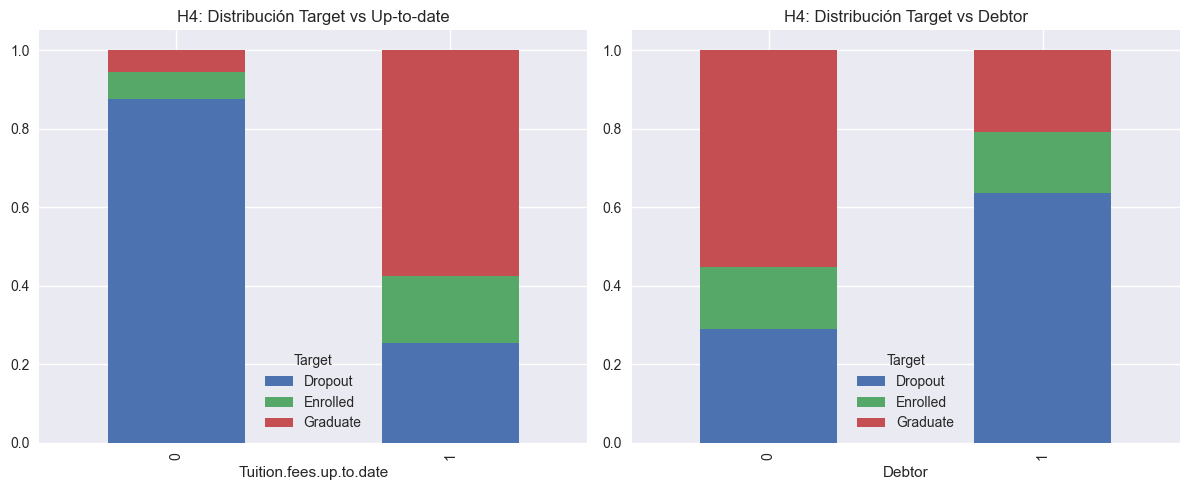

Chi2 Tuition fees (Graduate vs Dropout): chi2=709.50, p=2.574e-156


In [11]:
# Visualización y prueba H4
# Tablas de contingencia
cont_tuition = pd.crosstab(work['Tuition.fees.up.to.date'], work['Target'], normalize='index')
cont_debtor = pd.crosstab(work['Debtor'], work['Target'], normalize='index')
print('Proporciones por estado de pago:')
print(cont_tuition)
print('\nProporciones por estado de deudor:')
print(cont_debtor)

fig, axes = plt.subplots(1,2, figsize=(12,5))
cont_tuition.plot(kind='bar', stacked=True, ax=axes[0], title='H4: Distribución Target vs Up-to-date')
cont_debtor.plot(kind='bar', stacked=True, ax=axes[1], title='H4: Distribución Target vs Debtor')
plt.tight_layout(); plt.show()

# Chi-cuadrado (Graduate vs Dropout) para Tuition.fees.up.to.date
from scipy.stats import chi2_contingency
subset = work[work['Target'].isin(['Graduate','Dropout'])]
chi_table = pd.crosstab(subset['Tuition.fees.up.to.date'], subset['Target'])
chi2, p, dof, exp = chi2_contingency(chi_table)
print(f"Chi2 Tuition fees (Graduate vs Dropout): chi2={chi2:.2f}, p={p:.3e}")

## Hipótesis 5 (H5)
Edades extremas al inscribirse (muy jóvenes o mayores) muestran mayor tasa de Dropout comparadas con grupos centrales.

         dropout_rate
age_bin              
<=17         0.000000
18-21        0.226705
22-25        0.408907
26-30        0.612299
>30          0.546995


/var/folders/fw/3jb4y4dj6z108zm__f19t88c0000gn/T/ipykernel_82345/2668477268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_dropout = work.groupby('age_bin')['Target'].apply(lambda s: (s=='Dropout').mean()).to_frame('dropout_rate')


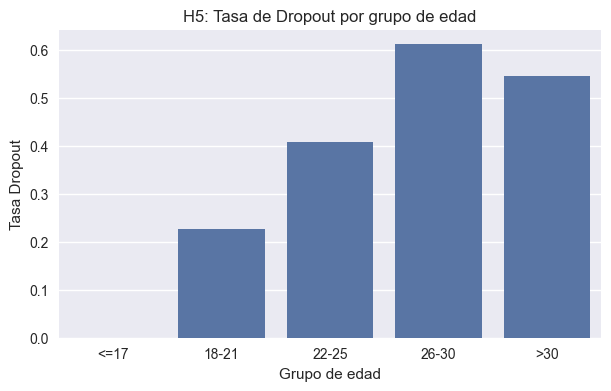

In [12]:
# Visualización H5
tasa_dropout = work.groupby('age_bin')['Target'].apply(lambda s: (s=='Dropout').mean()).to_frame('dropout_rate')
print(tasa_dropout)

plt.figure(figsize=(7,4))
sns.barplot(x=tasa_dropout.index, y='dropout_rate', data=tasa_dropout.reset_index())
plt.title('H5: Tasa de Dropout por grupo de edad')
plt.ylabel('Tasa Dropout')
plt.xlabel('Grupo de edad')
plt.show()


### Interpretación H1
Los estudiantes Graduate muestran distribución desplazada a mayores valores de `ratio_aprob_1` y `grade_1` respecto a Dropout. El p-valor Mann-Whitney indica diferencia estadísticamente significativa: la aprobación temprana es un indicador fuerte de éxito final.

### Interpretación H2
Las distribuciones de `delta_grade` y `delta_ratio_aprob` evidencian que quienes abandonan presentan con mayor frecuencia caídas (valores negativos). La tasa de Dropout aumenta en los cuartiles inferiores de `delta_grade`, apoyando la hipótesis de deterioro de rendimiento como señal de riesgo.

### Interpretación H3
La densidad de evaluaciones difiere menos drásticamente que las tasas de aprobación; sin embargo, estudiantes Graduate tienden a concentrarse en rangos moderados/altos de `dens_eval_1` y `dens_eval_2`. El scatter sugiere que la densidad potencia el efecto del ratio de aprobación pero no lo sustituye.

### Interpretación H4
Las barras apiladas muestran mayor proporción de Graduate entre quienes están al día en pagos y menor en deudores. La prueba chi-cuadrado sugiere asociación significativa: cumplimiento administrativo refuerza la probabilidad de graduarse (posible proxy de compromiso/recursos).

### Interpretación H5
La tasa de Dropout es relativamente más elevada en los extremos de edad (<=17 y >30) respecto a grupos intermedios; sugiere necesidades diferenciadas de apoyo. Es recomendable verificar tamaños de muestra para robustez estadística.
